In [2]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import spacy
import re
sns.set()
py.init_notebook_mode(connected = True)

import plotly.graph_objs as go
import plotly.figure_factory as ff


In [3]:
startups = pd.read_csv(r"C:\Users\Aditya Modi\Desktop\2018.csv")

In [4]:
startups.head(n=4)

,'ID,numbers,name,category,main_category,currency,deadline,goal,launched,year,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,1,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015 12:12,2015,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,2,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2017,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,3,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,2013,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,4,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,2012,1.0,failed,1,US,1.0,1.0,5000.00


In [5]:
uniq_year, index_year = np.unique(startups['year'], return_counts = True)    
print(uniq_year)
print(index_year)

[1970 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
[    7  1329 10519 26237 41165 44851 67745 77300 57184 52200   124]


In [5]:
currency_pie = startups.currency.value_counts()
curr_state = go.Pie(labels=currency_pie.index, values=currency_pie, textinfo='value')
layout = dict(title = 'Countries')
py.iplot(dict(data=[curr_state], layout=layout))

In [4]:
uniq_year, index_year = np.unique(startups['year'], return_counts = True)    
values = [go.Bar(x=uniq_year[1:],y=index_year,text=index_year,textposition = 'auto',marker=dict(color='#FADBD8'))]
area = go.Layout(title = 'Companies on Kickstarter over years')
fig = go.Figure(data = values, layout = area)
py.iplot(fig)

In [13]:
countries = startups.country.value_counts()
print(countries)

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64


In [12]:
state = startups.state.value_counts()

state_bar = go.Bar(x=state.index, y=state)
layout = dict(title = 'Current State',
              xaxis = dict(title = 'state'),
              yaxis = dict(title = 'Number of projects'))

py.iplot(dict(data=[state_bar], layout=layout))

In [18]:
startups['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [26]:
curr_state = go.Pie(labels=state_numb.index, values=state_numb, textinfo='value')
layout = dict(title = 'Overall state of Startups')
py.iplot(dict(data=[curr_state], layout=layout))

In [60]:
group_maincategories = startups.groupby(['main_category'])
group_maincategories['main_category'].count().reset_index(name='count').sort_values(['count'], ascending=False)   

,main_category,count
6,Film & Video,63585
10,Music,51918
12,Publishing,39874
8,Games,35231
13,Technology,32569
4,Design,30070
0,Art,28153
7,Food,24602
5,Fashion,22816
14,Theater,10913


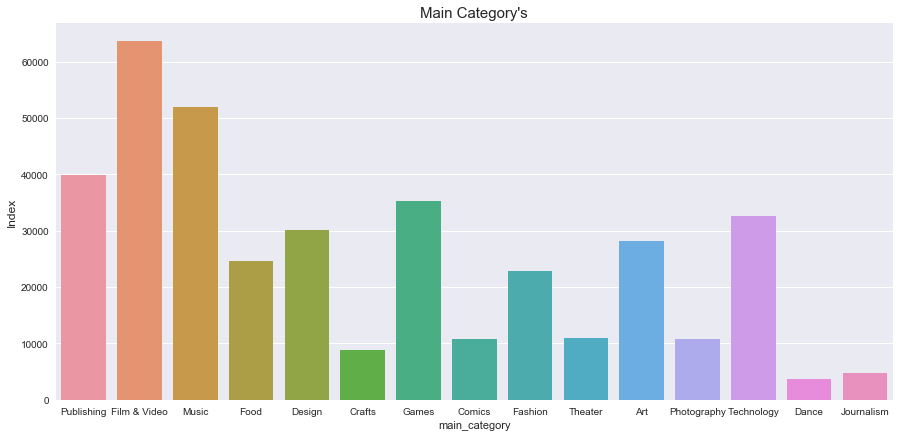

In [46]:
f= plt.subplots(figsize=(15,20))
plt.subplots_adjust(top = 0.7)

main_cat = plt.subplot(212)
main_cat = sns.countplot(x="main_category", data=startups)
main_cat.set_title("Main Category's", fontsize=15)
main_cat.set_ylabel("Index", fontsize=12)

plt.show()

In [48]:
len(startups["state"])

378661

In [56]:
Success_Rate = 133956/378661
Success_Rate

0.3537623362321443

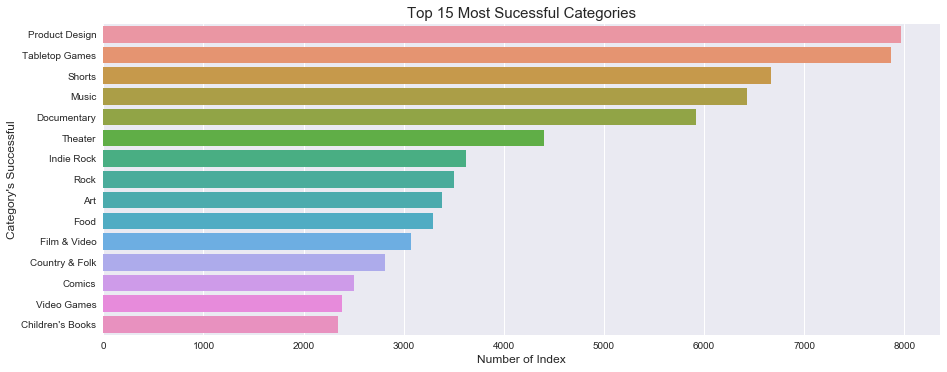

In [54]:
categorys_sucessful = startups[startups["state"] == "successful"]["category"].value_counts()[:15]

f = plt.subplots(figsize=(15,20))                                                     
plt.subplots_adjust(top = 0.6)

top_success = plt.subplot(212)
top_success = sns.barplot(x= categorys_sucessful.values, y=categorys_sucessful.index)  
top_success.set_title("Top 15 Most Sucessful Categories", fontsize=15)
top_success.set_xlabel("Number of Index", fontsize=12)
top_success.set_ylabel("Category's Successful", fontsize=12)

plt.show()

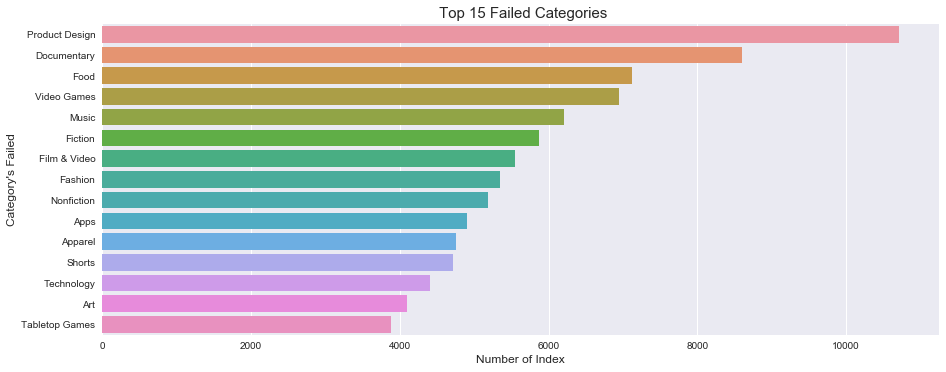

In [55]:
categorys_failed = startups[startups["state"] == "failed"]["category"].value_counts()[:15]

f = plt.subplots(figsize=(15,20))                                                      
plt.subplots_adjust(top = 0.6)

g1 = plt.subplot(212)
g1 = sns.barplot(x= categorys_failed.values, y=categorys_failed.index)          
g1.set_title(" Top 15 Failed Categories", fontsize=15)
g1.set_xlabel("Number of Index", fontsize=12)
g1.set_ylabel("Category's Failed", fontsize=12)
plt.show()

In [8]:
uniq_tech, index_tech = np.unique(startups[startups.main_category == 'Technology'].category, return_counts=True)
bar_tech = [go.Bar(x=uniq_tech,y=index_tech,text=index_tech,textposition = 'auto',marker=dict(color='#AED6F1'))]
layout = go.Layout(title = 'Categories inside Technology')
fig = go.Figure(data = bar_tech, layout = layout)
py.iplot(fig)

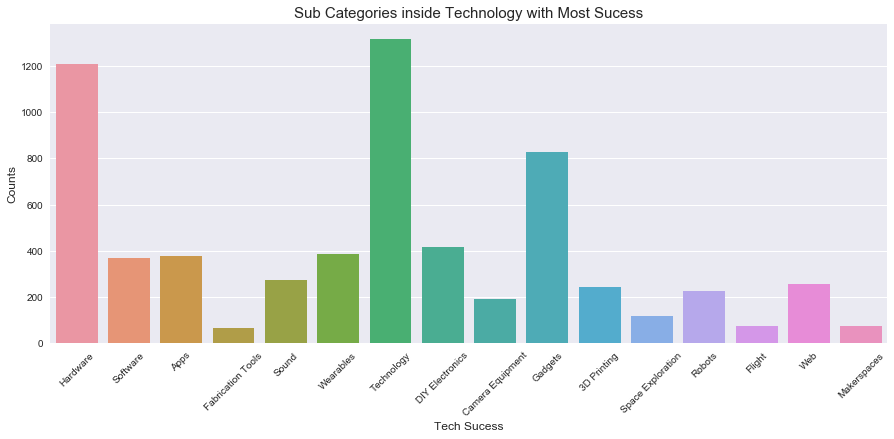

In [66]:
sucess_Tech = startups[(startups['main_category'] == 'Technology') & (startups['state'] == 'successful')]
plt.figure(figsize=(15,20))

plt.subplot(3,1,1)                                                  
ax2 = sns.countplot(x='category', data=sucess_Tech)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Sub Categories inside Technology with Most Sucess", fontsize=15)
ax2.set_xlabel("Tech Sucess", fontsize=12)
ax2.set_ylabel("Counts", fontsize=12)

plt.show()

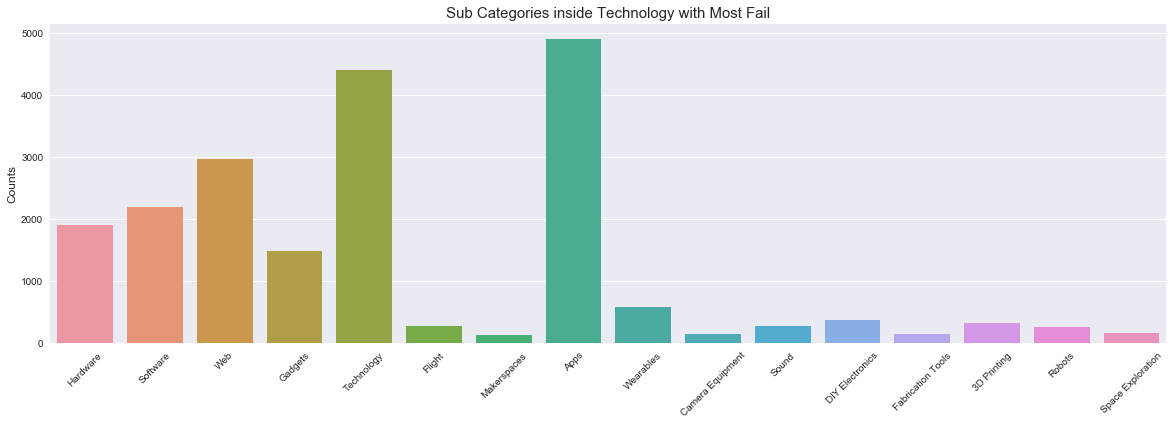

In [63]:
fail_Tech = startups[(startups['main_category'] == 'Technology') & (startups['state'] == 'failed')]

plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
ax2 = sns.countplot(x='category', data=fail_Tech)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)

ax2.set_title("Sub Categories inside Technology with Most Fail", fontsize=15)
ax2.set_xlabel("", fontsize=12)
ax2.set_ylabel("Counts", fontsize=12)


plt.show()

In [17]:
succ_ratio = startups[startups['state'] == 'successful'].groupby(['main_category']).count()['numbers']\
                / startups.groupby(['main_category']).count()['numbers'] * 100
succ_ratio = succ_ratio.sort_values(ascending=False)
    
print(succ_ratio)

main_category
Dance           62.048832
Theater         59.873545
Comics          53.997597
Music           46.606187
Art             40.883742
Film & Video    37.151844
Games           35.531208
Design          35.084802
Publishing      30.847169
Photography     30.661471
Food            24.733761
Fashion         24.513499
Crafts          24.009536
Journalism      21.282860
Technology      19.754982
Name: numbers, dtype: float64


In [18]:
fail_ratio = startups[startups['state'] == 'failed'].groupby(['main_category']).count()['numbers']\
                / startups.groupby(['main_category']).count()['numbers'] * 100

fail_ratio = fail_ratio.sort_values(ascending=True)
    
print(fail_ratio)


main_category
Dance           32.776008
Theater         33.977825
Comics          37.304742
Music           41.896837
Games           45.423065
Design          49.265048
Art             50.193585
Film & Video    51.748054
Publishing      58.045343
Photography     59.226273
Fashion         62.158135
Technology      63.299457
Crafts          64.740606
Food            64.909357
Journalism      65.972660
Name: numbers, dtype: float64


In [19]:
colorz = dict({'failed': '#B03A2E', 'successful': '#239B56'})

In [34]:
success_area = go.Bar( x=succ_ratio.index, y=succ_ratio,name='Success Rate', marker=dict(color=colorz['successful']))
fail_area = go.Bar(x=fail_ratio.index,y=fail_ratio, name='Fail Rate',marker=dict(color=colorz['failed']))

stack_bar = [success_area, fail_area]
layout = go.Layout( barmode='stack', title='Chances of Success or Fail in Main Category',width=1000,height=700)

fig = go.Figure(data=stack_bar, layout=layout)
py.iplot(fig)

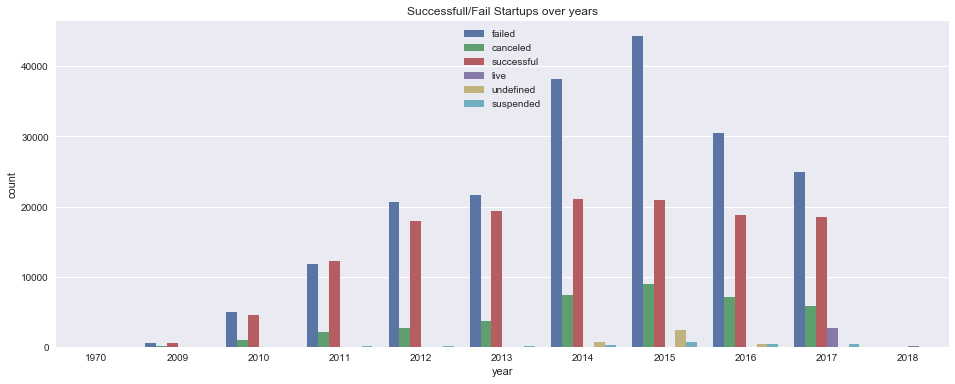

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(x='year', data=startups, hue='state')
plt.legend(loc='upper center')
plt.title('Successfull/Fail Startups over years')
plt.show()